In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### PATHS

In [2]:
TRAIN = '../Data/df_train.csv'
TEST = '../Data/df_test.csv'

In [3]:
z_score = lambda x : (x-np.mean(x,axis=0))/ np.std(x,axis=0) #code from exercise 5

In [4]:
col = 'tab10' #colour theme

df = pd.read_csv(TRAIN) #training dataframe

attributes = list(df.columns)[:-1] #creates list of column names for later, without the class

X = df[attributes].copy() #attributes
y = df['type'].copy() #true values
df['type_desc'] = ''
y_types = {1:'wind_float', 2:'wind_non', 3:'wind_veh', 5:'container', 6:'tableware', 7:'headlamp'}
y_list = y.unique() #'y' values

X_std = z_score(X) #standardizes X as later we see they are on different scales

for i in y_list: #this changes the 'type' to a descriptive word rather than a number
    #This is more human readable for plotting later - 'y' is still using the numbers
    df['type_desc'][df['type'] == i] = y_types[i]
    
df['type_desc'].unique()

array(['wind_non', 'wind_float', 'container', 'headlamp', 'tableware',
       'wind_veh'], dtype=object)

In [5]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.0,0.17
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.0,0.00


In [6]:
X.shape ## SMALL training set!!

(149, 9)

In [7]:
round(X.describe(), 3) #not on the same scales so we probably want to normalise data for most methods

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,1.518,13.420,2.725,1.435,72.624,0.485,8.924,0.200,0.062
std,0.003,0.863,1.422,0.506,0.783,0.570,1.511,0.553,0.098
min,1.511,10.730,0.000,0.290,69.810,0.000,5.430,0.000,0.000
25%,1.517,12.930,2.280,1.170,72.280,0.130,8.220,0.000,0.000
50%,1.518,13.300,3.490,1.360,72.780,0.550,8.590,0.000,0.000
75%,1.519,13.830,3.610,1.620,73.050,0.610,9.140,0.000,0.110
max,1.534,17.380,3.980,3.500,75.410,6.210,16.190,3.150,0.370


In [8]:
round(X_std.describe(), 2) #standardised to mean 0, std 1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.27,-3.13,-1.92,-2.27,-3.61,-0.85,-2.32,-0.36,-0.63
25%,-0.56,-0.57,-0.31,-0.52,-0.44,-0.63,-0.47,-0.36,-0.63
50%,-0.23,-0.14,0.54,-0.15,0.20,0.11,-0.22,-0.36,-0.63
75%,0.23,0.48,0.62,0.37,0.55,0.22,0.14,-0.36,0.50
max,4.84,4.60,0.89,4.09,3.57,10.08,4.82,5.35,3.17


In [9]:
count_dict = Counter(df['type_desc'])
count_dict.most_common(6) #k-fold instead of using a validation set could help here as some have few samples.

[('wind_non', 53),
 ('wind_float', 49),
 ('headlamp', 20),
 ('wind_veh', 12),
 ('container', 9),
 ('tableware', 6)]

In [10]:
df[df['type_desc']== 'tableware'] #very few samples compared to the others

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type,type_desc
23,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6,tableware
26,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6,tableware
28,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6,tableware
32,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6,tableware
71,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6,tableware
75,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6,tableware


In [11]:
df[df['type_desc']== 'container'] #also has relatively few samples.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type,type_desc
7,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.0,0.00,5,container
55,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.0,0.00,5,container
72,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,0.0,0.28,5,container
83,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.0,0.00,5,container
108,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.2,0.00,5,container
118,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.0,0.00,5,container
121,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.0,0.00,5,container
138,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.0,0.00,5,container
140,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.0,0.00,5,container


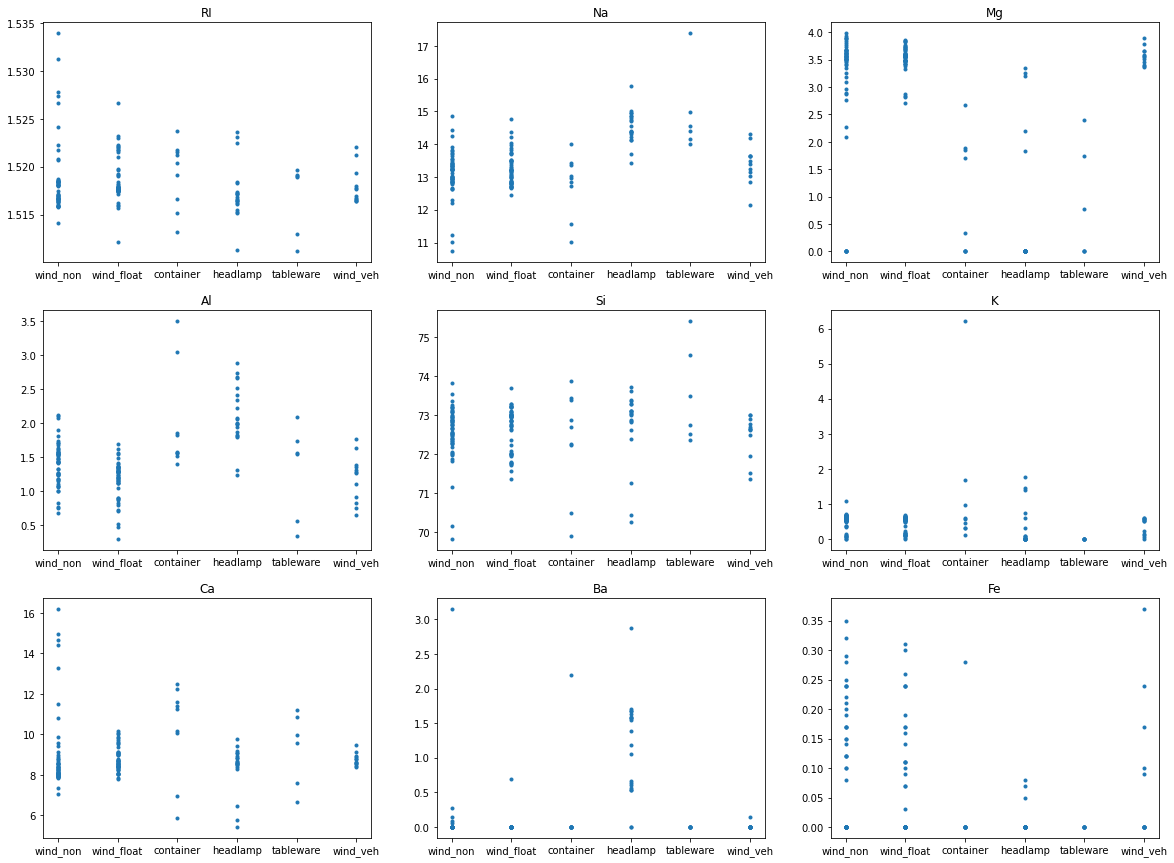

In [12]:
#visualise distributions by catagory and attribute
fig, ax = plt.subplots(3,3,figsize=(20,15))

for i in range(len(attributes)):
    plt.subplot(3,3,i+1)
    plt.scatter(df['type_desc'], X[attributes[i]], marker='.')
    plt.title(f'{attributes[i]}');
    
#plt.savefig('../Vis/attribute_distributions');

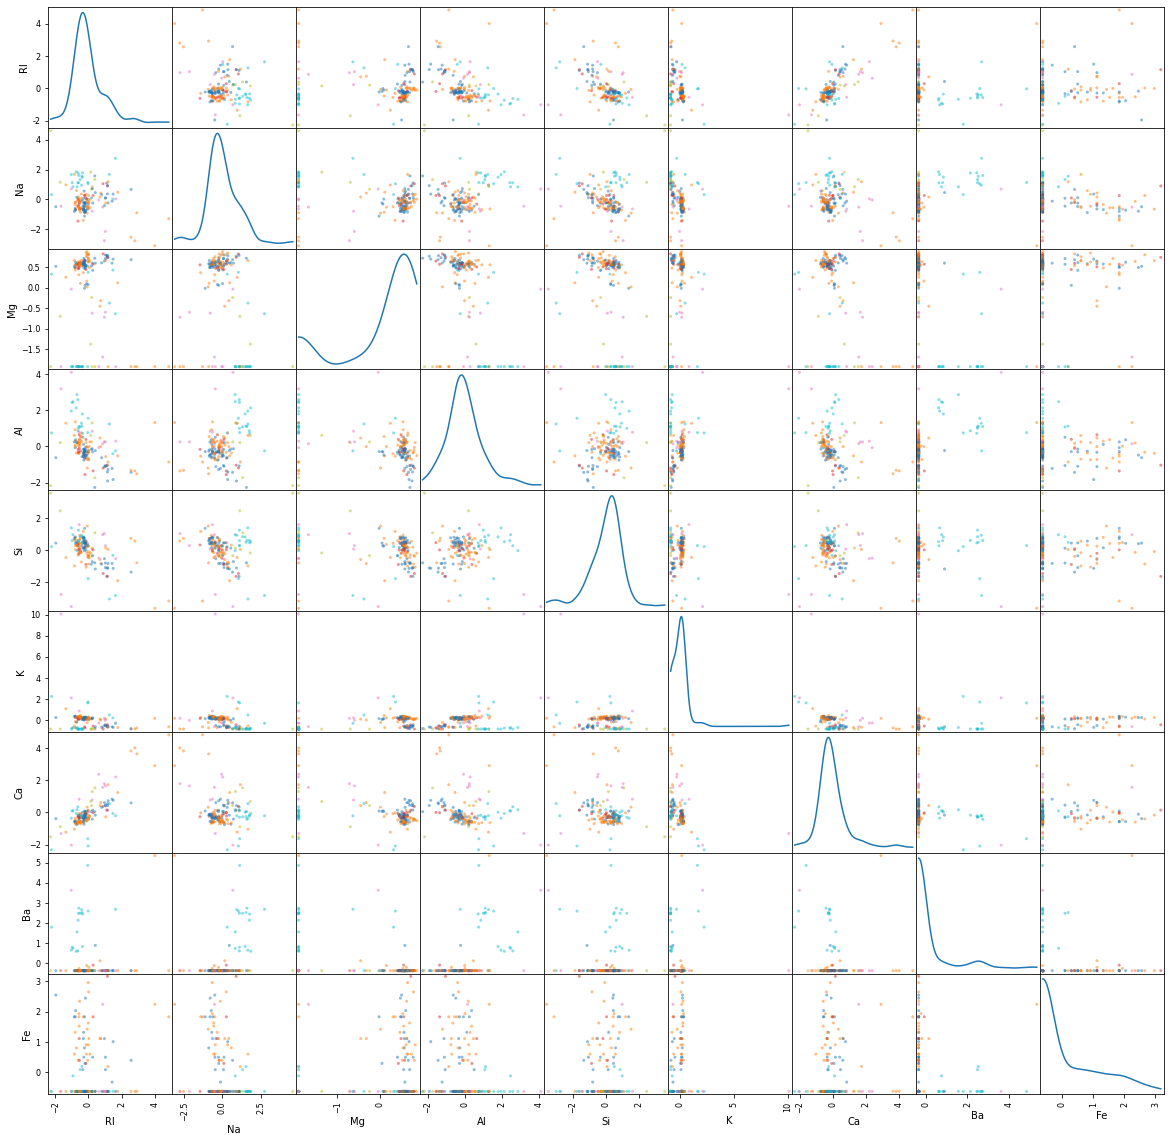

In [13]:
pd.plotting.scatter_matrix(X_std, c=y, figsize=(20,20), diagonal='kde', cmap=col);

#plt.savefig('../Vis/early_plot');